In [1]:
# scommentare in caso non si abbia installata la libreria imblearn
# pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# DESCRIZIONE del PROBLEMA 
Il dataset in analisi contiene informazioni riguardanti le statiche per giorno, dall'anno 2008 fino al 2018, e per locazione, cioè nello stato australiano. 
L'obbiettivo del dataset è predirre se il giorno successivo pioverà.
Questo viene fatto nella colonna 'RainTomorrow'.

In [3]:
dataset = pd.read_csv('weatherAUS.csv')

In [4]:
pd.options.display.max_columns = 24

In [5]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
dataset['Date']= pd.to_datetime(dataset["Date"])
#Creazione della colonna year 
dataset['year'] = dataset.Date.dt.year

Le Features del dataset sono le seguenti, visibili nella tabella del dataset:
1. `Date`: il giorno del mese della predizione.
2. `Location`: la città di analisi. 
3. `MinTemp`: temperatura più bassa per giornata in gradi.
4. `MaxTemp`: temperatura più alta per giornata in gradi.
5. `RainFall`: la quantità di precipitazioni registrate per la giornata in mm.
6. `Evaporation`: la cosiddetta evaporazione in padella di Classe A (mm) nelle 24 ore alle 9 del mattino.
7. `Sunshine`: il numero di ore di sole nel corso della giornata.
8. `WindGustDir`: la direzione della raffica di vento più forte nelle 24 ore fino a mezzanotte.
9. `WindGustSpeed`: la velocità (km/h) della raffica di vento più forte nelle 24 ore fino a mezzanotte.
10. `WindDir9am`: direzione del vento alle 9am. 
11. `WindDir3pm`: direzione del vento alle 3pm. 
12. `WindSpeed9am`: velocità media del vento in 10 minuti 9am.
13. `WindSpeed3pm`: velocità media del vento in 10 minuti 3pm.
14. `Humidity9am`: umidità (percentuale) alle 9am.
15. `Humidity3pm`: umidità (percentuale) alle 3pm.
16. `Pressure9am`: pressione atmosferica (hpa) a livello del mare alle 9am.
17. `Pressure3pm`: pressione atmosferica (hpa) a livello del mare alle 3pm.
18. `Cloud9am`: porzione di cielo nuvoloso alle 9am (in "oktas": eighths).
19. `Cloud3pm`: porzione di cielo nuvoloso alle 3pm (in "oktas": eighths).
20. `Temp9am`: Temperatura (gradi C) alle 9am.
21. `Temp3pm`: Temperatura (gradi C) alle 3pm.
22. `RainToday`: variabile categorica che indica se ha piovuto il giorno stesso.
23. `RainTomorrow`: variabile categorica che indica se pioverà il giorno successivo.

La variabile da predirre è `RainTomorrow`; tutte le altre variabili le utilizzeremo com features

`id` identifica univocamente i record del dataset, ma non avendo alcuna importanza ai fini della predizione, si procede a sostituire l'indice del dataframe pandas con  la colonna `Date`.

In [6]:
dataset.set_index('Date',inplace=True)
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Date,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


Ora analiziamo le statistiche per ogni feature.

In [8]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000


Dalla tabella soprastante possiamo notare la presenza di valori nulli, sopratutto in corrispondenza della colonna Sunshine, Evaporation, Could9am e Could3pm. 

# Data Preprocessing

Osserviamo la tipologia delle varibili del nostro dataset:

In [7]:
num = (dataset.dtypes == "float64")
num_cols = list(num[num].index)

print("Variabili Numeriche:")
print(num_cols)

Variabili Numeriche:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
cat = (dataset.dtypes == "object")
object_cols = list(cat[cat].index)

print("Variabili Categoriche:")
print(object_cols)

Variabili Categoriche:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Ricerchiamo i valori Nan e li sostituiamo con '0' nelle variabili numeriche, mentre in quelle categoriche mettiamo la media, così da non avere problemi con essi nello studio dei dati.

In [9]:
for i in object_cols:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

for i in num_cols:
    dataset[i].fillna(0, inplace=True)

Utilizziamo LabelEncoder che ci permette di enumerare le label delle varibili categoriche: 

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    dataset[i] = label_encoder.fit_transform(dataset[i])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460

In [14]:
dataset.head(120)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Date,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008
2008-12-02,2,7.4,25.1,0.0,0.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,2008
2008-12-03,2,12.9,25.7,0.0,0.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,2008
2008-12-04,2,9.2,28.0,0.0,0.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,2008
2008-12-05,2,17.5,32.3,1.0,0.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-03-26,2,13.3,29.8,1.8,0.0,0.0,15,33.0,3,14,0.0,20.0,87.0,26.0,1019.1,1017.2,0.0,6.0,16.2,29.2,1,0,2009
2009-03-27,2,10.1,27.6,0.0,0.0,0.0,14,43.0,3,13,0.0,11.0,63.0,30.0,1023.0,1020.7,0.0,0.0,16.5,26.8,0,0,2009
2009-03-28,2,9.1,28.9,0.0,0.0,0.0,6,24.0,3,3,2.0,17.0,60.0,26.0,1023.8,1020.6,0.0,0.0,14.0,27.7,0,0,2009


# Data Exploring

Ora analiziamo i dati attraverso i grafici, dopo averli raggruppati per anno:

In [11]:
gb = dataset.groupby('year')
print("Tipo gb :",type(gb))
gb.describe()

Tipo gb : <class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Location                                                     MinTemp  \
        count       mean        std  min   25%   50%   75%   max    count   
year                                                                        
2007     61.0   9.000000   0.000000  9.0   9.0   9.0   9.0   9.0     61.0   
2008   2270.0  17.557709  12.738097  0.0   9.0  14.5  31.0  47.0   2270.0   
2009  16789.0  23.782238  14.329087  0.0  11.0  23.0  36.0  48.0  16789.0   
2010  16782.0  23.776785  14.329671  0.0  11.0  23.0  36.0  48.0  16782.0   
2011  15407.0  23.778867  14.327664  0.0  11.0  23.0  36.0  48.0  15407.0   
2012  15409.0  23.781556  14.328648  0.0  11.0  23.0  36.0  48.0  15409.0   
2013  16415.0  23.980506  14.161077  0.0  12.0  24.0  36.0  48.0  16415.0   
2014  17885.0  24.000000  14.142531  0.0  12.0  24.0  36.0  48.0  17885.0   
2015  17885.0  24.000000  14.142531  0.0  12.0  24.0  36.0  48.0  17885.0   
2016  17934.0  24.000000  14.142530  0.0  12.0  24.0  36.0  48.0  17934.0   
2017   8623.0  24.000000  14.143776  0.0  12.0  24.0  36.0  48.0   8623.0   

                                ... RainToday                RainTomorrow  \
           mean       std  min  ...       25%  50%  75%  max        count   
year                            ...                                         
2007  12.545902  3.002309  6.1  ...       0.0  0.0  1.0  1.0         61.0   
2008  12.390661  6.593456 -5.3  ...       0.0  0.0  0.0  1.0       2270.0   
2009  12.010328  6.300053 -8.5  ...       0.0  0.0  0.0  1.0      16789.0   
2010  11.948236  6.579830 -8.0  ...       0.0  0.0  0.0  1.0      16782.0   
2011  11.967742  6.435061 -8.2  ...       0.0  0.0  0.0  1.0      15407.0   
2012  11.182478  6.388649 -6.8  ...       0.0  0.0  0.0  1.0      15409.0   
2013  11.846220  6.194554 -6.5  ...       0.0  0.0  0.0  1.0      16415.0   
2014  12.323360  6.391940 -7.6  ...       0.0  0.0  0.0  1.0      17885.0   
2015  11.951138  6.715641 -8.2  ...       0.0  0.0  0.0  1.0      17885.0   
2016  12.406167  6.522438 -7.8  ...       0.0  0.0  0.0  1.0      17934.0   
2017  13.544265  6.710372 -5.9  ...       0.0  0.0  0.0  1.0       8623.0   

                                                   
          mean       std  min  25%  50%  75%  max  
year                                               
2007  0.311475  0.466940  0.0  0.0  0.0  1.0  1.0  
2008  0.225110  0.417747  0.0  0.0  0.0  0.0  1.0  
2009  0.214843  0.410726  0.0  0.0  0.0  0.0  1.0  
2010  0.238172  0.425978  0.0  0.0  0.0  0.0  1.0  
2011  0.242617  0.428679  0.0  0.0  0.0  0.0  1.0  
2012  0.219936  0.414217  0.0  0.0  0.0  0.0  1.0  
2013  0.211087  0.408093  0.0  0.0  0.0  0.0  1.0  
2014  0.198882  0.399170  0.0  0.0  0.0  0.0  1.0  
2015  0.203970  0.402958  0.0  0.0  0.0  0.0  1.0  
2016  0.233244  0.422908  0.0  0.0  0.0  0.0  1.0  
2017  0.204453  0.403325  0.0  0.0  0.0  0.0  1.0  

[11 rows x 176 columns]

<AxesSubplot:ylabel='RainTomorrow'>

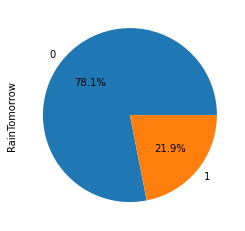

In [16]:
dataset['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

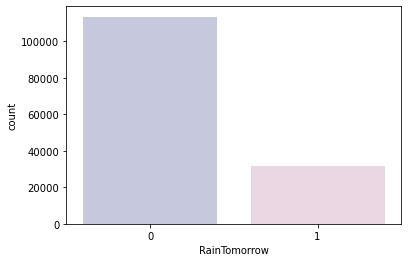

In [17]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= dataset["RainTomorrow"], palette= cols)

Dai precedenti grafici notiamo che la variabile da predirre RainTomorrow è sbilanciata, per questo, dopo aver selezionato le feature rilevanti, la andremo a bilanciare facendo oversampling della classe minoritaria con **Synthetic Minority Oversampling Technique** (**SMOTE**)

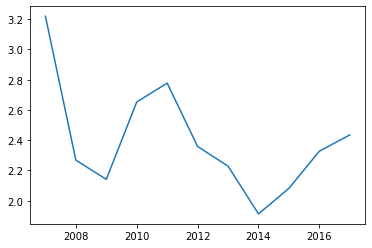

In [18]:
plt.plot(gb['Rainfall'].mean())

Text(0.5, 0, 'year')

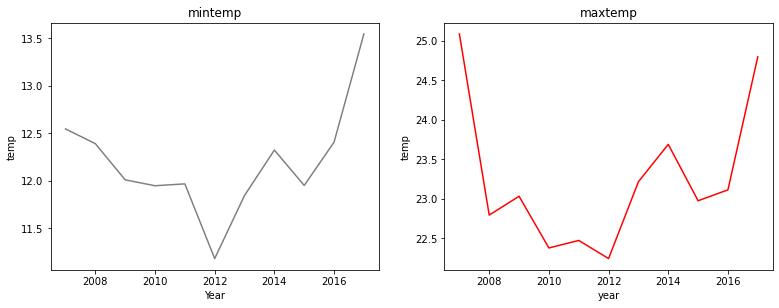

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('mintemp')
plt.plot(gb['MinTemp'].mean(), label="mintemp", color='gray')
plt.ylabel('temp')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
plt.title('maxtemp')
plt.plot(gb['MaxTemp'].mean(), label="maxtemp", color='red')
plt.ylabel('temp')
plt.xlabel('year')

#### Correlazione tra i dati

Annulliamo i valori sulla diagonale per rendere corretta la lettura della correlazione.

In [20]:
corr = dataset.corr().replace(1,0)

<AxesSubplot:>

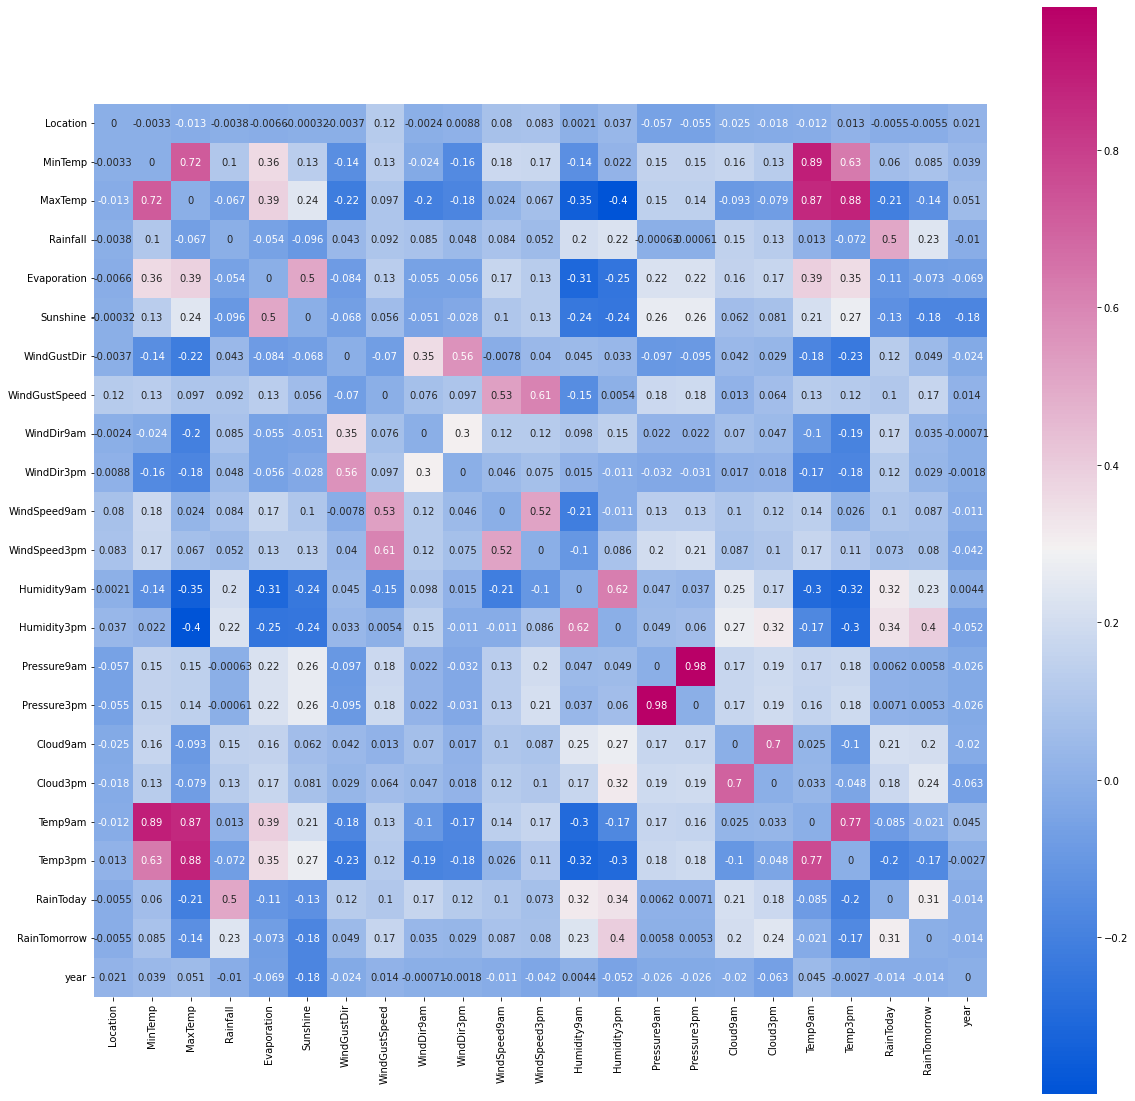

In [21]:
cmap = sns.diverging_palette(260,-10,s=100, l=40, n=6, as_cmap=True)
plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap= cmap,annot=True, square=True)

In [22]:
corrRainTomorrow = corr['RainTomorrow']

In [23]:
corrRainTomorrow.max(), np.abs(corrRainTomorrow).idxmax()

(0.3979514149519119, 'Humidity3pm')

Possiamo individuare che la correlazione maggiore sulla viariabile RainTomorrow è 'Humidity3pm'.

# Selezione feature rilevanti

Ai fini dell'elaborazione dei dati del dataframe possiamo notare che abbiamo ancora delle feature non rilevanti; infatti eliminiamo la feature year, in quanto utile soltanto per la rappresentazione dei dati. Suddividiamo poi il dataset in:
1. y, variabile da predirre.
2. X, dataset delle feature rilevanti.

In [12]:
X = dataset.drop(['year', 'RainTomorrow'], axis=1)

y = dataset['RainTomorrow']

Applichiamo ora la funzione SMOTE, che come detto in precedenza è utilizzata per fare oversampling della classe minoritaria in RainTomorrow

In [13]:
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

Suddividiamo il dataset, per ottenere miglior predizione e prestazioni, in training set e validation set.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

# Creazione ed addestramento dei modelli

In [15]:
def best_params(model):
    print('Parametri migliori:', model.best_params_)  
    print('Miglior train score: {:.4f}%\nMiglior validation score: {:.4f}%'.format(round(model.best_score_ * 100, 4), round(model.score(X_val, y_val)*100, 4)))

## Perceptron
Addestiamo ora Perceptron

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
perceptron = Perceptron(max_iter=5000, tol=1e-3, early_stopping=True, n_jobs=-1, random_state=42, n_iter_no_change=5)
perceptron.fit(X_train, y_train)
print('Accuratezza sul trainining: {:.2f}%'.format(perceptron.score(X_train, y_train)*100))
print('Accuratezza sul validation: {:.2f}%'.format(perceptron.score(X_val, y_val)*100))

Accuratezza sul trainining: 74.04%
Accuratezza sul validation: 74.13%


## Cross-Validation con Stratified k-fold

Dopo aver testato precedentemente i modelli sottostanti con `GridSearch` con il paramaetro cv = 5 (default 5-fold cross validation), avendo ottenuto per `Perceptron` con regressione uno score sul training inferiore di circa il 4% rispetto al validation, abbiamo provato ad utilizzare Stratified k-fold per il parametro cv, ottenendo come si vede in seguito score milgiori

Utilizziamo Stratified K fold in quanto ci permette di ottenedere la stessa proporzione ai dati.

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(3, shuffle=True, random_state=42)

for train, val in skf.split(X_train, y_train):
    print(y_train.iloc[val].value_counts())

0    25295
1    25187
Name: RainTomorrow, dtype: int64
0    25295
1    25186
Name: RainTomorrow, dtype: int64
0    25294
1    25187
Name: RainTomorrow, dtype: int64


### Perceptron con regressione

Tramite `GridSearch` proviamo ora a determinare se l'applicazione della regressione Lasso e/o Ridge porta benefici all'accuratezza del modello

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [55]:
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=5000, n_jobs=-1, early_stopping=True, n_iter_no_change=5, random_state=42))
])

parameters = [
    {
        'std': [None, StandardScaler()],
        'perceptron__penalty': [None, 'l1', 'l2'],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
        'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
    },
    {
        'std': [None, StandardScaler()],
        'perceptron__penalty': ['elasticnet'],
        'perceptron__l1_ratio': [0.1, 0.3, 0.5, 0.7],
        'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
    }
]

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=skf, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)

best_params(perceptron_cv)

Parametri migliori: {'perceptron__alpha': 0.001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1, 'std': None}
Miglior train score: 74.6999%
Miglior validation score: 74.6164%


In [116]:
pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns).nlargest(3)

Cloud3pm    36314.782801
MinTemp     27848.697934
Rainfall    15341.797844
dtype: float64

Successivamente valutiamo, attraverso la Confiusion Matrix, la qualità delle previsioni del modello.

In [19]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

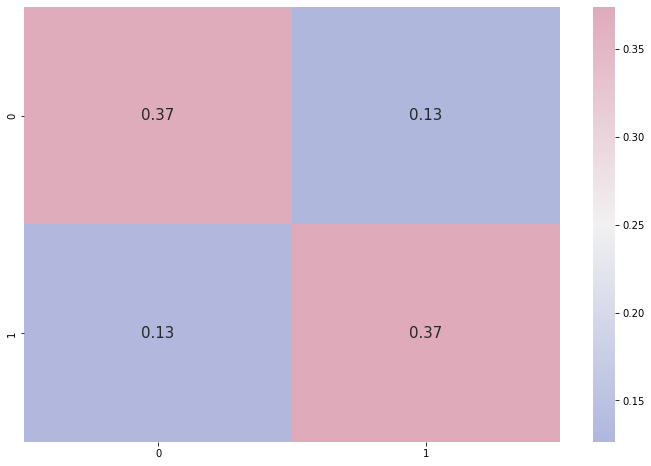

In [56]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))

cf_matrix = confusion_matrix(y_val, perceptron_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [20]:
from sklearn.metrics import classification_report

In [57]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     37699
           1       0.75      0.74      0.75     38023

    accuracy                           0.75     75722
   macro avg       0.75      0.75      0.75     75722
weighted avg       0.75      0.75      0.75     75722



Dalle statistiche della cella precedente possiamo determinare: 
1. <b>precision</b>: è la percentuale delle previsioni positive corrette (TP) sul totale delle previsioni positive del     modello (giuste TP o sbagliate FP).

    $$ P R = \frac{T P} {T P + F P}$$ <br>
    
2. <b>recall o sensitivity</b>: la percentuale delle previsioni positive corrette (TP) sul totale delle istanze positive (i positivi TP ed i falsi negativi FN), varia da 0 a 1.

    $$ R e c a l l =\frac{T P} {T P + F N} $$ <br>
    
3. <b>f1-score</b>: media armonica delle metriche Precision e Recall.

    $$ F S = \frac{2 ⋅ R e c a l l ⋅ P r e c i s i o n}{ R e c a l l + P r e c i s i o n}$$ <br>

### Perceptron con Polynomial Features
Eseguiamo Perceptron applicando anche un filtro polinomiale

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5, random_state=42))
])

parameters = [
    {
        'std': [None, StandardScaler()],
        'perceptron__penalty': ['l1', 'l2', None],
        'perceptron__alpha': [0.0001, 0.001, 0.01],
        'perceptron__tol': [1e-9, 1e-6, 1e-3, 1],
    },
    {
        'std': [None, StandardScaler()],
        'perceptron__penalty': ['elasticnet'],
        'perceptron__l1_ratio': [0.1, 0.3, 0.5],
        'perceptron__tol': [1e-9, 1e-6, 1e-3, 1],
    }
]

poly_perceptron_cv = GridSearchCV(poly_perceptron, parameters, cv=skf, n_jobs=-1, scoring='f1')
poly_perceptron_cv.fit(X_train, y_train)

best_params(poly_perceptron_cv)

Parametri migliori: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1e-09, 'std': StandardScaler()}
Miglior train score: 74.9849%
Miglior validation score: 69.1354%


<AxesSubplot:>

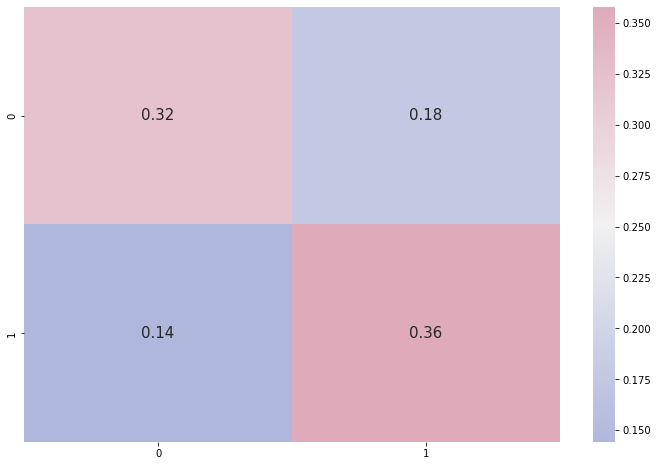

In [60]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, poly_perceptron_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [61]:
pd.Series(poly_perceptron_cv.best_estimator_[2].coef_[0]).nlargest(3) 

4     482.670472
16    310.227086
15    216.680375
dtype: float64

In [62]:
pred = poly_perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67     37699
           1       0.67      0.71      0.69     38023

    accuracy                           0.68     75722
   macro avg       0.68      0.68      0.68     75722
weighted avg       0.68      0.68      0.68     75722



Notiamo che applicando un filtro polinomiale a perceptron le sue prestazioni non migliorano, per questo per il confronto tra i modelli useremo **Perceptron con penalty l1**

In [63]:
pred_perceptron = perceptron_cv.predict(X_val)

## Logistic Regression

Utilizziamo ora la Regressione Logistica per determinare la probabilità di `RainTomorrow`, attraverso una trasformazione logit sulla probabilità. 

In [65]:
from sklearn.linear_model import LogisticRegression

std_logisticRegression = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(solver='saga', random_state=42))
])

parameters = [
    {
        'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
        'lr__C': [1, 0.01, 0.001],
        'lr__penalty': ['l1', 'l2']
    },
    {
        'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
        'lr__l1_ratio': [0.2, 0.3, 0.5],
        'lr__penalty': ['elasticnet']
    },
    {
        'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
        'lr__penalty': ['none']
    }
]

logisticRegression_cv = GridSearchCV(std_logisticRegression, parameters, cv=skf, n_jobs=-1, scoring='f1')
logisticRegression_cv.fit(X_train, y_train)

best_params(logisticRegression_cv)

Parametri migliori: {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__tol': 1}
Miglior train score: 75.1143%
Miglior validation score: 74.8944%


Cerchiamo le Features maggiormente rilevanti per determinare RainTomorrow.

In [66]:
pd.Series(logisticRegression_cv.best_estimator_[1].coef_[0], index=X_train.columns).nlargest(3)

Humidity3pm      0.856694
WindGustSpeed    0.626571
MinTemp          0.481256
dtype: float64

Possiamo infatti notare che, come già visto in precedenza, una delle feature più determinanti è l'umidità alle 3 di pomeriggio del giorno prima; ma anche la velocità del vento influenza la nostra variabile target, dato che il vento permette lo spostamento delle nuvole e modifica la probabilità di pioggia in una determinata locazione geografica.
Infine anche la temperatura massima influenza la probabilità di pioggia.

<AxesSubplot:>

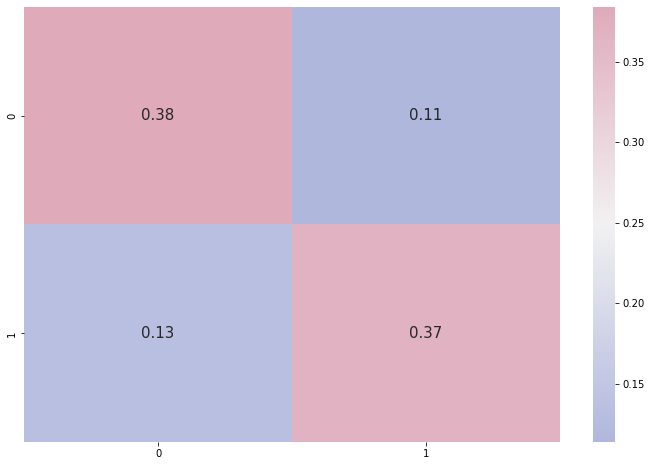

In [67]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, logisticRegression_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [68]:
predLogisticRegression = logisticRegression_cv.predict(X_val)

Proviamo ora a vedere se usando alberi/foreste riusciamo ad ottenere risultati migliori

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [29]:
DTc = Pipeline([
    ('std', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42))
])


parameters = {
    'std': [None, StandardScaler()],
    'dtc__max_depth': range(2,20),
    'dtc__min_samples_leaf': range(1,10,2),
    'dtc__min_samples_split': range(2,10,2)
}

DTc_cv = GridSearchCV(DTc, parameters, cv=skf, n_jobs=-1, scoring='f1')
DTc_cv.fit(X_train, y_train)

best_params(DTc_cv)

Parametri migliori: {'dtc__max_depth': 17, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2, 'std': None}
Miglior train score: 82.8235%
Miglior validation score: 83.9487%


<AxesSubplot:>

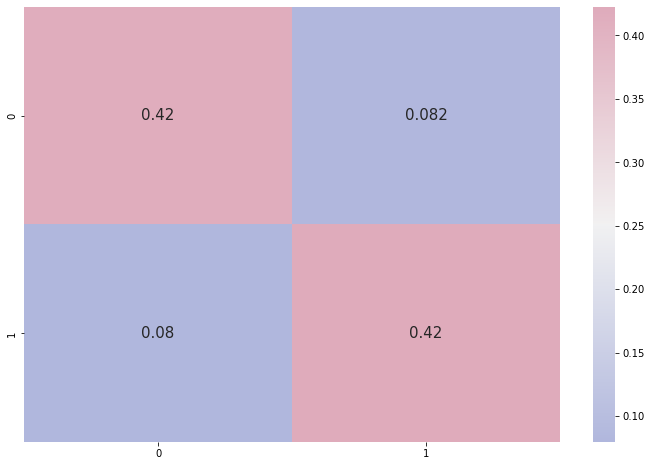

In [51]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, DTc_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [49]:
pd.Series(DTc_cv.best_estimator_[1].feature_importances_, index=X_train.columns).nlargest(3)

Humidity3pm      0.330104
Rainfall         0.191302
WindGustSpeed    0.064430
dtype: float64

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=42))
])

parameters = {
    'std': [None, StandardScaler()],
    'rfc__n_estimators': [100, 200],
    'rfc__max_depth': range(2,10,2),
    'rfc__min_samples_leaf': range(1,5),
    'rfc__min_samples_split': [2, 5, 10],
}

rfc_cv = GridSearchCV(rfc, parameters, cv=skf, n_jobs=-1, scoring='f1')
rfc_cv.fit(X_train, y_train)

best_params(rfc_cv)

Parametri migliori: {'rfc__max_depth': 8, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 200, 'std': StandardScaler()}
Miglior train score: 81.6203%
Miglior validation score: 81.3793%


<AxesSubplot:>

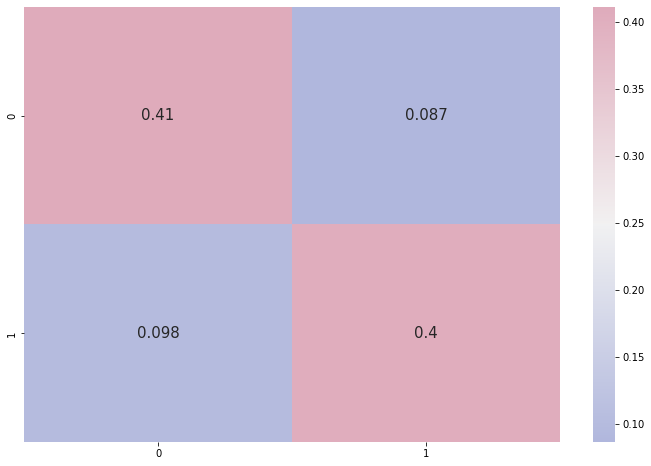

In [81]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, rfc_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [86]:
pd.Series(rfc_cv.best_estimator_[1].feature_importances_, index=X_train.columns).nlargest(3)

Humidity3pm    0.277242
Rainfall       0.219783
Sunshine       0.095846
dtype: float64


In [87]:
predRandomForest = rfc_cv.predict(X_val)

## XGBOOST 

In [39]:
from xgboost import XGBClassifier

In [103]:
xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(objective='binary:logistic'))
])

parameters ={
    'std': [None, StandardScaler()],
    'xgb__eta': [0.001, 0.01, 1],
    'xgb__max_depth': range(2, 12, 8),
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001, 0.01, 1],
}

xgboost_cv = GridSearchCV(xgb, parameters, cv=skf, n_jobs=-1, scoring='f1')
xgboost_cv.fit(X_train, y_train)

best_params(xgboost_cv)

Parametri migliori: {'std': None, 'xgb__alpha': 1, 'xgb__eta': 1, 'xgb__max_depth': 2, 'xgb__n_estimators': 300}
Miglior train score: 90.0982%
Miglior validation score: 90.0038%


<AxesSubplot:>

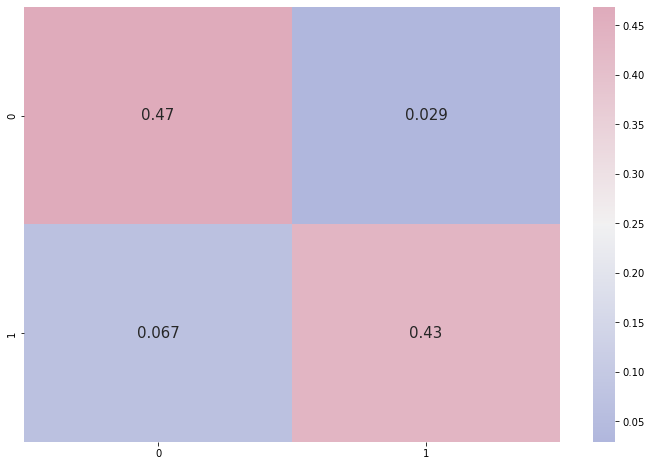

In [104]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, xgboost_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [105]:
pd.Series(xgboost_cv.best_estimator_[1].feature_importances_, index=X_train.columns).nlargest(3)

Rainfall       0.193258
Humidity3pm    0.191329
Cloud9am       0.112168
dtype: float32


In [106]:
predXGBoost = xgboost_gridsearch.predict(X_val)

## SVM 

In [40]:
from sklearn.svm import SVC

In [76]:
std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(random_state=42))
])

parameters = {
    'svm__kernel': ['rbf'],
    'svm__C': [0.01, 0.1, 1, 0.001],
}

svm_cv = GridSearchCV(std_svm, parameters, cv=skf, n_jobs=-1, scoring='f1')
svm_cv.fit(X_train, y_train)

best_params(svm_cv)

Parametri migliori: {'svm__C': 1, 'svm__kernel': 'rbf'}
Miglior train score: 81.6563%
Miglior validation score: 82.0445%


<AxesSubplot:>

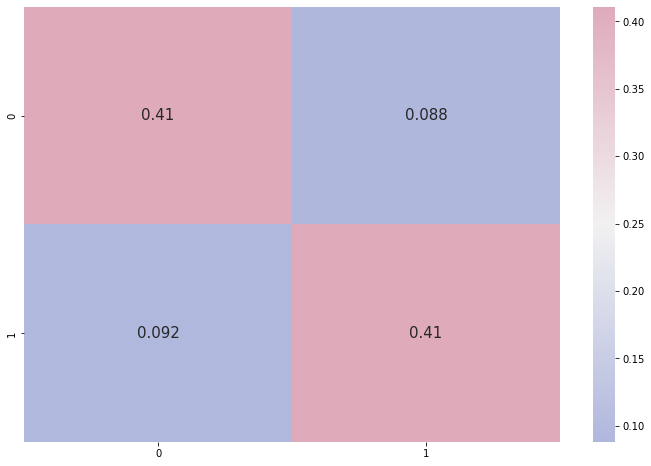

In [77]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, svm_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [78]:
pd.Series(svm_cv.best_estimator_[1].support_vectors_[0], index=X_train.columns).nlargest(3)

RainToday     1.675308
Location      1.163442
WindDir3pm    0.510298
dtype: float64


Dalla cella precedente, possiamo notare che SVM ha individuato che la velocità della raffica di vento più forte indice sulla probiabilità che possa piovere. 

In [83]:
predSVM = svm_cv.predict(X_val)

# Comparazione dei modelli

Perceptron, Logistic Regresion RandomForesti e XGBOOST hanno individuato che la percentuale di umidità alle 3pm influenza la probabilità di pioggia, come abbiamo stimato tramite lo studio della correlazione tra le variabili del dataset; mentre per SVM il primo parametro che influenza la probabilità è WindGustSpeed

In [43]:
from sklearn.model_selection import cross_val_score

Costruiamo i 3 modelli con i parametri migliori trovati con Grid Search

In [41]:
DTc = DecisionTreeClassifier(random_state=42, max_depth=17, min_samples_leaf=1, min_samples_split=2)

In [42]:
rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   max_depth=8, 
                                   min_samples_leaf=1, 
                                   min_samples_split=2,
                                  n_estimators=200))
])

In [44]:
xgboost = XGBClassifier(objective='binary:logistic', alpha=1, eta=1, max_depth=2, n_estimators=300)

In [45]:
svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(random_state=42, kernel='rbf', C=1))
])

Calcoliamo lo **scarto quatratico medio** (deviazione standard) e la **media** degli score per ogni modello

In [47]:
mean = [cross_val_score(model, X_val, y_val, cv=skf, scoring='f1').mean() 
        for model in [DTc, rfc, xgboost, svm]]
std = [cross_val_score(model, X_val, y_val, cv=skf, scoring='f1').std() 
        for model in [DTc, rfc, xgboost, svm]]

In [48]:
model_name = ["DecisionTreeClassifier", "RandomForest", "XGBoost", "SVM"]
pd.DataFrame(
    data={"Media":mean, "Deviazione Standard": std}, index=model_name
)

,Media,Deviazione Standard
DecisionTreeClassifier,0.810031,0.002732
RandomForest,0.814493,0.000727
XGBoost,0.896755,0.000877
SVM,0.810662,0.002883


In conclusione possiamo dedurre, analizzando i dati delle statistiche sopra riportate, che il modello più adeguato per predirre la nostra variabile target `RainTorrow` è XGBOOST.